In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Read excel data (only median anual pay for each ocupation)
df = pd.read_excel("PROV - Occupation SOC10 (4) Table 14.7a   Annual pay - Gross 2017.xls",
                   sheetname=4,
                   header=4,
                   skip_footer=5,
                   dtype={"Code": object},
                   names=["description", "code", "median", "annual_percentage_change"],
                   usecols=[0, 1, 3, 4],
                   na_values="x")

# Trim white spaces
df["description"] = df["description"].apply(lambda x: x.strip())
# Asign code "0000" to "All employees"
df.loc[0, "code"] = "0000"
# Filter rows with median anual pay value
withMedian = df["median"].notnull()
# Filter rows with 4-letter code (the most specific occupation description)
with4LetterCode = df["code"].apply(lambda x: len(str(x)) == 4)
df4 = df[withMedian & with4LetterCode]

In [3]:
df4

,description,code,median,annual_percentage_change
0,All employees,0000,28758.0,2.0
4,Chief executives and senior officials,1115,89825.0,-0.6
7,Production managers and directors in man...,1121,47525.0,3.4
8,Production managers and directors in con...,1122,43098.0,-0.3
9,Production managers and directors in min...,1123,46905.0,3.6
11,Financial managers and directors,1131,66039.0,3.7
12,Marketing and sales directors,1132,76876.0,2.7
13,Purchasing managers and directors,1133,47538.0,-0.5
14,Advertising and public relations directors,1134,58758.0,3.6
15,Human resource managers and directors,1135,47911.0,3.8


In [6]:
# Filter rows with 4-letter code (the most specific occupation description)
with2LetterCode = df["code"].apply(lambda x: len(str(x)) == 2)
df2 = df[withMedian & with2LetterCode]

In [7]:
df2

,description,code,median,annual_percentage_change
2,Corporate managers and directors,11,46369.0,1.9
32,Other managers and proprietors,12,30470.0,1.3
53,"Science, research, engineering and technolog...",21,41508.0,2.1
80,Health professionals,22,34734.0,0.4
99,Teaching and educational professionals,23,37805.0,0.2
109,"Business, media and public service professio...",24,38547.0,2.3
145,"Science, engineering and technology associat...",31,28760.0,1.4
160,Health and social care associate professionals,32,25000.0,0.7
173,Protective service occupations,33,38001.0,3.6
181,"Culture, media and sports occupations",34,27783.0,2.0


In [8]:
# Add 2-letter code to 4-letter code DataFrame
df4["code_temp"] = df4["code"].apply(lambda x: str(x)[:2])

/Users/zhenmao/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df = df4.merge(df2, how="outer", left_on="code_temp", right_on="code", suffixes=('_4', '_2'))
del df["code_temp"]

In [10]:
df

,description_4,code_4,median_4,annual_percentage_change_4,description_2,code_2,median_2,annual_percentage_change_2
0,All employees,0000,28758.0,2.0,NaN,NaN,NaN,NaN
1,Chief executives and senior officials,1115,89825.0,-0.6,Corporate managers and directors,11,46369.0,1.9
2,Production managers and directors in man...,1121,47525.0,3.4,Corporate managers and directors,11,46369.0,1.9
3,Production managers and directors in con...,1122,43098.0,-0.3,Corporate managers and directors,11,46369.0,1.9
4,Production managers and directors in min...,1123,46905.0,3.6,Corporate managers and directors,11,46369.0,1.9
5,Financial managers and directors,1131,66039.0,3.7,Corporate managers and directors,11,46369.0,1.9
6,Marketing and sales directors,1132,76876.0,2.7,Corporate managers and directors,11,46369.0,1.9
7,Purchasing managers and directors,1133,47538.0,-0.5,Corporate managers and directors,11,46369.0,1.9
8,Advertising and public relations directors,1134,58758.0,3.6,Corporate managers and directors,11,46369.0,1.9
9,Human resource managers and directors,1135,47911.0,3.8,Corporate managers and directors,11,46369.0,1.9


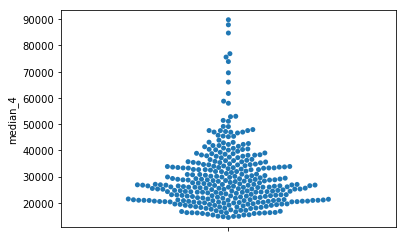

In [102]:
ax = sns.swarmplot(y=df["median_4"])

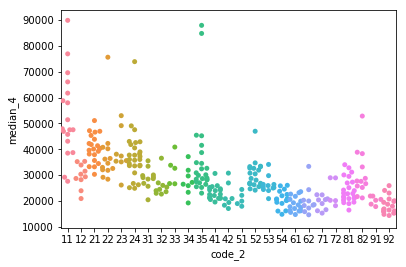

In [104]:
ax = sns.swarmplot(y=df["median_4"], x=df["code_2"])

In [11]:
with open("data.json", "w") as outfile:
    outfile.write(df.to_json(orient='records'))